In [90]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os

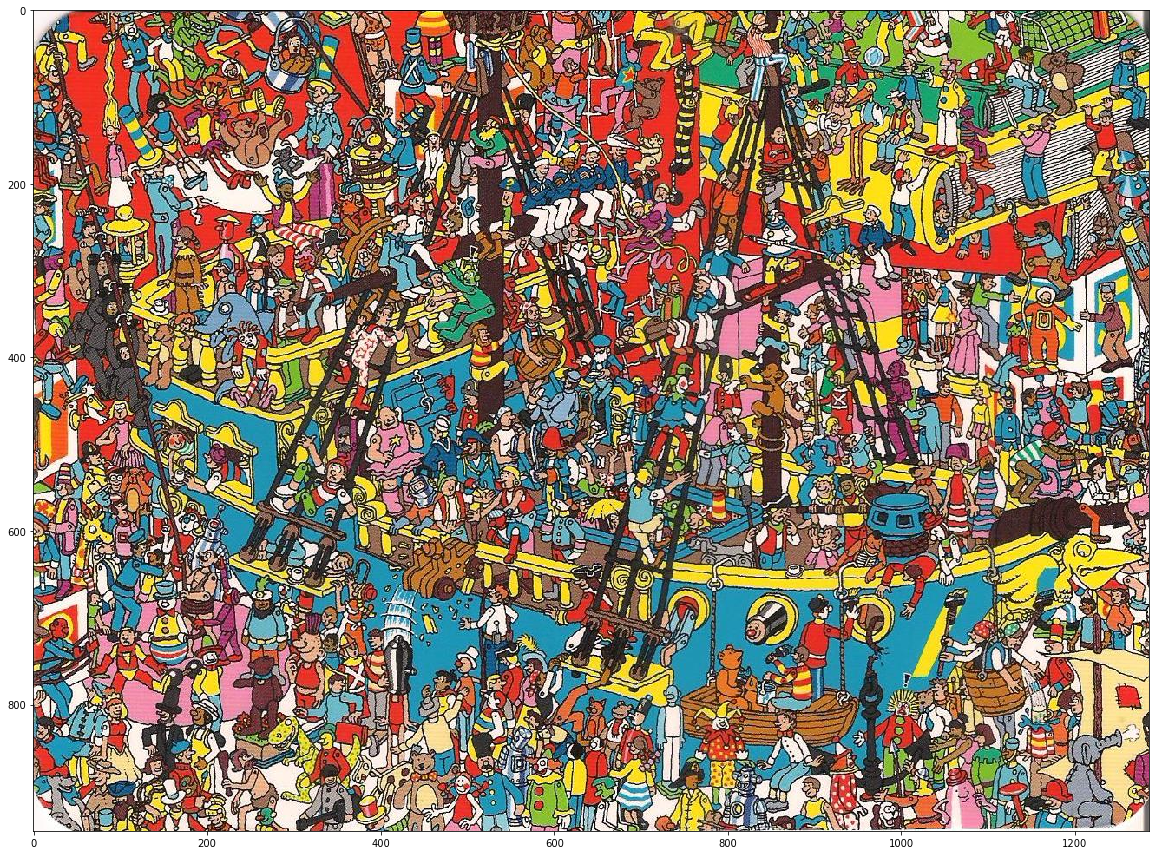

In [3]:
images = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in ['data/original-images\\%d.jpg' % i for i in range(1, len(glob("data/original-images/*"))+1)]]
fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(images[1])

In [4]:
df = pd.read_csv("data/locations.csv")
df.head()

,image,x,y
0,1,726,540
1,2,96,543
2,3,1415,486
3,4,1498,296
4,5,1598,621


In [5]:
def crop(img, coords, size=64):
    y = [coords[0] - size//2, coords[0] + size//2]
    x = [coords[1] - size//2, coords[1] + size//2]
    
    if y[0] < 0:
        y[0] = 0
        y[1] = size
        
    if y[1] > img.shape[1]:
        y[1] = img.shape[1]
        y[0] = y[1] - size
      
    if x[0] < 0:
        x[0] = 0
        x[1] = size
        
    if x[1] > img.shape[0]:
        x[1] = img.shape[0]
        x[0] = x[1] - size
    
    return img[x[0]:x[1], y[0]:y[1], :]

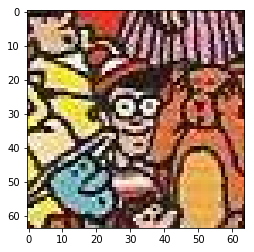

In [76]:
i = 1
plt.imshow(crop(images[i], df[["x", "y"]].values[i]))

In [101]:
ignore = [9, 15]
size = 64
generated_images = []
for i in [i for i in range(len(images)) if i not in ignore]:
    for j in range(30):
        center = np.add(df[["x", "y"]].values[i], np.random.randint(-20, 21, size=(2,)))
        generated_images.append(crop(images[i], center, size=size))
generated_images = np.asarray(generated_images)

In [102]:
generated_images.shape

(510, 64, 64, 3)

In [103]:
if os.path.exists("data/%d/generated" % size):
    for img in glob("data/%d/generated/*" % size):
        os.remove(img)
    os.removedirs("data/%d/generated" % size)

os.makedirs('data/%d/generated' % size)

for i in range(generated_images.shape[0]):
    cv2.imwrite("data/%d/generated/%d.jpg" % (size, i), cv2.cvtColor(generated_images[i], cv2.COLOR_BGR2RGB))

In [19]:
df

,image,x,y
0,1,726,540
1,2,96,543
2,3,1415,486
3,4,1498,296
4,5,1598,621
5,6,1738,436
6,7,839,984
7,8,1182,308
8,9,252,756
9,10,0,0
